## Reading in semi-structured text data

In [1]:
# Read in the raw text
rawtext = open("imdb_sentiment.csv").read()
#Print the raw data
print(rawtext[:500])

review,sentiment
"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ",0
"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ",0
"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ",0
Very little music or anything to speak of.  ,0
The best scene in the movie was when Gerardo is


## Importing the libraries

In [2]:
import pandas as pd
import os
import string
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import SnowballStemmer

In [3]:
reviews = pd.read_csv("imdb_sentiment.csv")
pd.set_option('display.max_colwidth', 100)
reviews.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1


In [4]:
reviews.shape

(748, 2)

In [5]:
reviews.sentiment.value_counts()

1    386
0    362
Name: sentiment, dtype: int64

In [6]:
reviews.sentiment.value_counts(normalize = True)

1    0.516043
0    0.483957
Name: sentiment, dtype: float64

## Clean up text

- Remove Punctuation

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def remove_punct(text):
    text_nonpunct = "".join([char for char in text if char not in string.punctuation])
    return text_nonpunct
reviews['review_nopunct'] = reviews['review'].apply(lambda x: remove_punct(x))
reviews.head()

,review,sentiment,review_nopunct
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...
3,Very little music or anything to speak of.,0,Very little music or anything to speak of
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...


## Tokenization

In [9]:
import re

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
reviews['review_tokenize'] = reviews['review_nopunct'].apply(lambda x: tokenize(x.lower()))
reviews.head()

,review,sentiment,review_nopunct,review_tokenize
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh..."
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]"
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep..."


## Remove stopwords

In [10]:
stopword = nltk.corpus.stopwords.words("english")
stop_updated = stopword  + ["movi", "film", "watch"]
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
reviews['review_nostop'] = reviews['review_tokenize'].apply(lambda x: remove_stopwords(x))
reviews.head()

,review,sentiment,review_nopunct,review_tokenize,review_nostop
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]"
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]"
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]"


## Stemming

In [11]:
ps = nltk.PorterStemmer()
ss = nltk.SnowballStemmer(language = 'english')

In [12]:
def poter_stemming(text):
    text = [ps.stem(word) for word in text]
    return text
reviews['review_poter_stem'] = reviews['review_nostop'].apply(lambda x: poter_stemming(x))
reviews.head()

,review,sentiment,review_nopunct,review_tokenize,review_nostop,review_poter_stem
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]","[sure, lost, flat, charact, audienc, nearli, half, walk, ]"
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]","[littl, music, anyth, speak, ]"
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]"


In [13]:
def snowball_stemming(text):
    text = [ss.stem(word) for word in text]
    return text
reviews['review_snowball_stem'] = reviews['review_nostop'].apply(lambda x: snowball_stemming(x))
reviews.head()

,review,sentiment,review_nopunct,review_tokenize,review_nostop,review_poter_stem,review_snowball_stem
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]","[sure, lost, flat, charact, audienc, nearli, half, walk, ]","[sure, lost, flat, charact, audienc, near, half, walk, ]"
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]","[littl, music, anyth, speak, ]","[littl, music, anyth, speak, ]"
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]"


## Lemmatization

In [14]:
wn = nltk.WordNetLemmatizer()

In [15]:
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
reviews['review_lemmatizer'] = reviews['review_nostop'].apply(lambda x: lemmatizer(x))
reviews.head()


,review,sentiment,review_nopunct,review_tokenize,review_nostop,review_poter_stem,review_snowball_stem,review_lemmatizer
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]","[sure, lost, flat, charact, audienc, nearli, half, walk, ]","[sure, lost, flat, charact, audienc, near, half, walk, ]","[sure, lost, flat, character, audience, nearly, half, walked, ]"
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempting, artiness, black, white, clever, camera, angle, movie, disappointed, became, even, r..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]","[littl, music, anyth, speak, ]","[littl, music, anyth, speak, ]","[little, music, anything, speak, ]"
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movie, gerardo, trying, find, song, keep, running, head, ]"


## Cleaning all these things together using user defined function

In [16]:
# Creating a user defined function
def clean_text(text):
    # Stripping white spaces before and after the text
    text = text.strip(" ")
    # Replacing multiple spaces with a single space
    text = re.sub("\s+"," ", text)
    text =re.sub("[^\w\s]"," ",text)
    #text = re.sub("\d+$","",text)
    # Replacing punctuations
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # Creating tokens
    tokens = re.split('\W+', text)
    # removing stopwords and stemming - snowball stemming
    text_final = [ss.stem(word) for word in tokens if word not in stop_updated and len(word)>2]
#     # creating a list of tokens
    text_final = " ".join(text_final)
    return text_final

In [17]:
reviews['reviews_cleaned'] = reviews['review'].apply(lambda x: clean_text(x))
reviews.head()

,review,sentiment,review_nopunct,review_tokenize,review_nostop,review_poter_stem,review_snowball_stem,review_lemmatizer,reviews_cleaned
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]",slow move aimless movi distress drift young man
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]","[sure, lost, flat, charact, audienc, nearli, half, walk, ]","[sure, lost, flat, charact, audienc, near, half, walk, ]","[sure, lost, flat, character, audience, nearly, half, walked, ]",sure lost flat charact audienc near half walk
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempting, artiness, black, white, clever, camera, angle, movie, disappointed, became, even, r...",attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot lin...
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]","[littl, music, anyth, speak, ]","[littl, music, anyth, speak, ]","[little, music, anything, speak, ]",littl music anyth speak
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movie, gerardo, trying, find, song, keep, running, head, ]",best scene movi gerardo tri find song keep run head


## WOrdcloud for clean data

In [18]:
from wordcloud import WordCloud

In [19]:
reviews_combined_clean = " ".join(reviews.reviews_cleaned.values)

In [20]:
reviews_combined_clean[:500]

'slow move aimless movi distress drift young man sure lost flat charact audienc near half walk attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non exist littl music anyth speak best scene movi gerardo tri find song keep run head rest movi lack art charm mean empti work guess empti wast two hour saw movi today thought good effort good messag kid bit predict love cast jimmi buffet scienc teacher babi owl ador movi show lot florida best made l'

In [21]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined_clean)

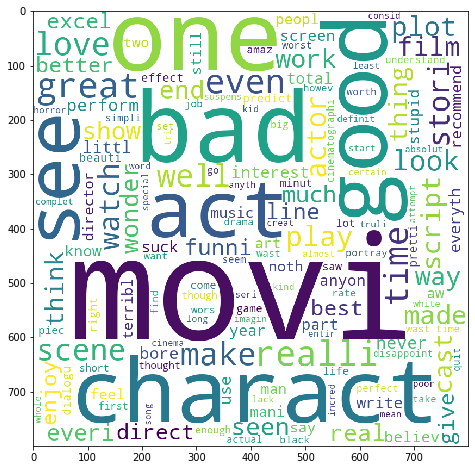

In [22]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## Bar Graph on top 25 words

In [23]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
all_terms = word_tokenize(reviews_combined_clean)
fdist = FreqDist(all_terms)

In [24]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

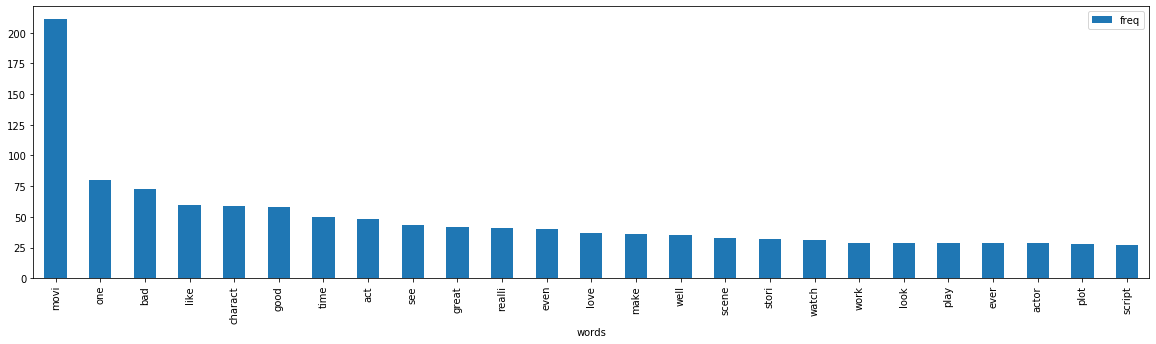

In [25]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

## Plot the bar graph for top 25 frequenctly used bigrams

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=150)
X_bigram = bigram_count_vectorizer.fit_transform(reviews['reviews_cleaned'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [27]:
DTM_bigram.head(20)

,act bad,also great,anyon could,appreci subtl,art movi,avoid avoid,avoid cost,bad act,bad bad,bad direct,...,volcano los,wast time,well done,well pace,whole thing,wind lion,wish could,worth check,worth see,year old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
bigram_count_vectorizer.get_feature_names()[:20]

['act bad',
 'also great',
 'anyon could',
 'appreci subtl',
 'art movi',
 'avoid avoid',
 'avoid cost',
 'bad act',
 'bad bad',
 'bad direct',
 'bad even',
 'bad idea',
 'bad movi',
 'bad review',
 'bad script',
 'best movi',
 'best part',
 'best scene',
 'big fan',
 'billi drago']

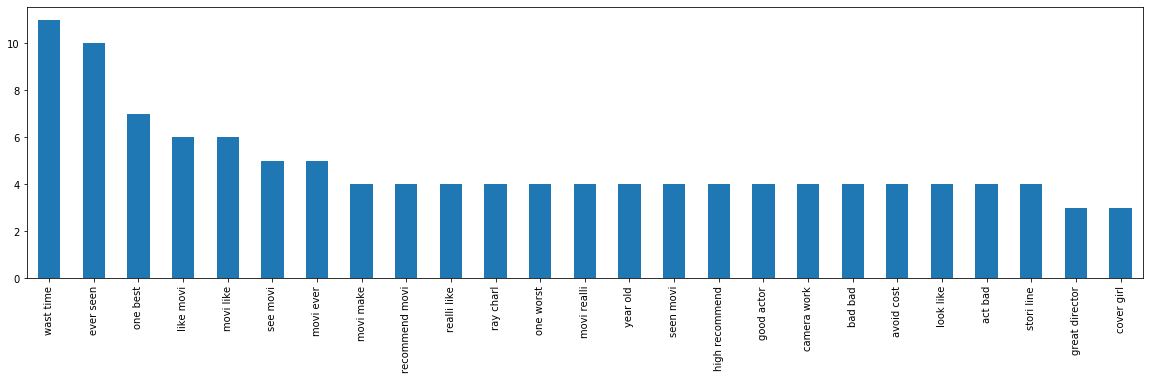

In [29]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))  

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# create a bigram count vectorizer object
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2))

In [32]:
X_bigram = bigram_tfidf_vectorizer.fit_transform(reviews['reviews_cleaned'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), 
                          columns=bigram_tfidf_vectorizer.get_feature_names())

In [33]:
DTM_bigram

,15pm fast,18th centuri,1947 masterpiec,1948 quit,1949 hollywood,1971 format,1973 stranger,1980 experi,1986 version,1995 monster,...,young man,young movi,young play,younger set,youth energi,yun fat,zillion time,zombi movi,zombi student,zombiez part
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.381071,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## Sentiment analysis and sentiment predictions

In [34]:
X_text = reviews.reviews_cleaned.values
y = reviews.sentiment.values

In [35]:
count_vect = CountVectorizer(max_features=3500)
X = count_vect.fit_transform(X_text)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [38]:
logreg.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.7866666666666666

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.78

In [41]:
afinn = pd.read_csv("AFINN-111.txt", sep="\t", header=None)
afinn.columns = ['Term','Score']
term_scores = dict(afinn.values)

In [42]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [43]:
reviews['sent_score_afinn'] = reviews.reviews_cleaned.apply(get_sentiment)

In [44]:
reviews.head()

,review,sentiment,review_nopunct,review_tokenize,review_nostop,review_poter_stem,review_snowball_stem,review_lemmatizer,reviews_cleaned,sent_score_afinn
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]",slow move aimless movi distress drift young man,-2
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]","[sure, lost, flat, charact, audienc, nearli, half, walk, ]","[sure, lost, flat, charact, audienc, near, half, walk, ]","[sure, lost, flat, character, audience, nearly, half, walked, ]",sure lost flat charact audienc near half walk,-3
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempting, artiness, black, white, clever, camera, angle, movie, disappointed, became, even, r...",attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot lin...,-2
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]","[littl, music, anyth, speak, ]","[littl, music, anyth, speak, ]","[little, music, anything, speak, ]",littl music anyth speak,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movie, gerardo, trying, find, song, keep, running, head, ]",best scene movi gerardo tri find song keep run head,3


In [45]:
reviews['sent_prediction_afinn'] = \
reviews.sent_score_afinn.apply(lambda x:1 if x>0 else 0)
reviews.head()

,review,sentiment,review_nopunct,review_tokenize,review_nostop,review_poter_stem,review_snowball_stem,review_lemmatizer,reviews_cleaned,sent_score_afinn,sent_prediction_afinn
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]",slow move aimless movi distress drift young man,-2,0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]","[sure, lost, flat, charact, audienc, nearli, half, walk, ]","[sure, lost, flat, charact, audienc, near, half, walk, ]","[sure, lost, flat, character, audience, nearly, half, walked, ]",sure lost flat charact audienc near half walk,-3,0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempting, artiness, black, white, clever, camera, angle, movie, disappointed, became, even, r...",attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot lin...,-2,0
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]","[littl, music, anyth, speak, ]","[littl, music, anyth, speak, ]","[little, music, anything, speak, ]",littl music anyth speak,0,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movie, gerardo, trying, find, song, keep, running, head, ]",best scene movi gerardo tri find song keep run head,3,1


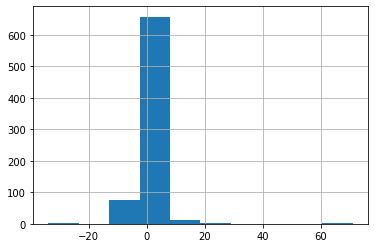

In [46]:
reviews.sent_score_afinn.hist()

In [47]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_afinn)

0.6925133689839572

In [48]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction_afinn)

array([[298,  64],
       [166, 220]], dtype=int64)

In [49]:
def clean_txt_new(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub("[^\w\s]","",result)
    #Normalize case and remove shorter tokens
    tokens = word_tokenize(result1.lower())
    token_new = [(term) for term in tokens \
               if term not in stop_updated and \
               len(term) > 2] 
    #Join all to form a single string which will be returned from the UDF       
    res = " ".join(token_new)
    return res

In [50]:
reviews['clean_review_unstemmed'] = reviews.review.apply(clean_txt_new)

In [51]:
reviews.head()

,review,sentiment,review_nopunct,review_tokenize,review_nostop,review_poter_stem,review_snowball_stem,review_lemmatizer,reviews_cleaned,sent_score_afinn,sent_prediction_afinn,clean_review_unstemmed
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]",slow move aimless movi distress drift young man,-2,0,slowmoving aimless movie distressed drifting young man
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]","[sure, lost, flat, charact, audienc, nearli, half, walk, ]","[sure, lost, flat, charact, audienc, near, half, walk, ]","[sure, lost, flat, character, audience, nearly, half, walked, ]",sure lost flat charact audienc near half walk,-3,0,sure lost flat characters audience nearly half walked
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempting, artiness, black, white, clever, camera, angle, movie, disappointed, became, even, r...",attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot lin...,-2,0,attempting artiness black white clever camera angles movie disappointed became even ridiculous a...
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]","[littl, music, anyth, speak, ]","[littl, music, anyth, speak, ]","[little, music, anything, speak, ]",littl music anyth speak,0,0,little music anything speak
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movie, gerardo, trying, find, song, keep, running, head, ]",best scene movi gerardo tri find song keep run head,3,1,best scene movie gerardo trying find song keeps running head


In [52]:
reviews['sent_score_afinn'] = reviews.clean_review_unstemmed.apply(get_sentiment)
#AFINN Prediction by setting the threshold to 0
reviews['sent_prediction_afinn'] = reviews.sent_score_afinn.apply(lambda x:1 if x>0 else 0)
accuracy_score(reviews.sentiment,reviews.sent_prediction_afinn)

0.7513368983957219

In [53]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction_afinn)

array([[299,  63],
       [123, 263]], dtype=int64)

## Sentiment analysis using vader

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [55]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [56]:
reviews['sent_score_vader'] = reviews.review.apply(get_vader_sentiment)
reviews['sent_prediction_vader'] = reviews.sent_score_vader.apply(lambda x:1 if x>0.3 else 0)
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7780748663101604

In [57]:
X_text = reviews.reviews_cleaned.values
y = reviews.sent_prediction_vader.values

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_text,y,test_size=0.20,
                                                 random_state=42)
count_vect = CountVectorizer(max_features=3500)
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)
print(X_train.shape, X_test.shape)

(598, 2122) (150, 2122)


In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred = logreg.predict(X_test)
accuracy_score(y_test,y_pred)

0.76

In [61]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
Y_pred=mnb.predict(X_test)
accuracy_score(y_test,Y_pred)

0.7266666666666667

## Document Similarity

In [72]:
count_vectorizer = CountVectorizer(stop_words = 'english')
sparse_matrix = count_vectorizer.fit_transform(reviews.review)

In [73]:
sparse_matrix

<748x2811 sparse matrix of type '<class 'numpy.int64'>'
	with 6251 stored elements in Compressed Sparse Row format>

In [74]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, columns = count_vectorizer.get_feature_names())

In [75]:
df

,10,12,13,15,15pm,17,18th,1928,1947,1948,...,yelps,yes,young,younger,youthful,youtube,yun,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
# Cosine similarity across documents
print(cosine_similarity(df))

[[1.         0.         0.08838835 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.08838835 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [78]:
cosine_similarity(df)[0]

array([1.        , 0.        , 0.08838835, 0.        , 0.11785113,
       0.11785113, 0.        , 0.10660036, 0.        , 0.        ,
       0.        , 0.13363062, 0.        , 0.        , 0.125     ,
       0.        , 0.        , 0.09449112, 0.        , 0.11201102,
       0.15811388, 0.15811388, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08838835, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14433757, 0.        , 0.        , 0.        ,
       0.        , 0.20412415, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.125     , 0.        , 0.        , 0.        , 0.        ,
       0.20412415, 0.        , 0.        , 0.13363062, 0.        ,
       0.375     , 0.        , 0.        , 0.        , 0.     

In [79]:
cosine_similarity(df)[0].argsort() # sort the values of the index

array([747, 410, 411, 412, 413, 415, 416, 417, 418, 419, 420, 421, 422,
       423, 425, 426, 409, 427, 408, 406, 667, 392, 393, 394, 395, 396,
       397, 398, 399, 400, 401, 402, 403, 665, 405, 664, 428, 429, 430,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 452, 449, 448, 663, 431, 432, 433, 434, 435, 436, 437,
       390, 438, 440, 441, 442, 443, 444, 445, 446, 439, 468, 389, 387,
       675, 332, 333, 334, 335, 674, 337, 339, 340, 673, 342, 343, 344,
       345, 346, 330, 347, 676, 327, 310, 311, 312, 313, 627, 315, 316,
       317, 318, 320, 321, 322, 323, 324, 326, 328, 348, 349, 350, 372,
       746, 374, 375, 376, 377, 378, 379, 669, 381, 382, 383, 384, 385,
       386, 371, 370, 369, 368, 351, 352, 353, 354, 672, 356, 357, 668,
       358, 360, 361, 671, 364, 365, 366, 367, 359, 469, 470, 471, 571,
       572, 573, 639, 638, 576, 636, 578, 579, 580, 581, 582, 583, 584,
       635, 640, 634, 569, 567, 551, 552, 553, 554, 555, 556, 55

In [80]:
## SImilarity between the first document an all other documents
cosine_similarity(df[0:1], df[1:]).flatten()

array([0.        , 0.08838835, 0.        , 0.11785113, 0.11785113,
       0.        , 0.10660036, 0.        , 0.        , 0.        ,
       0.13363062, 0.        , 0.        , 0.125     , 0.        ,
       0.        , 0.09449112, 0.        , 0.11201102, 0.15811388,
       0.15811388, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08838835, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.14433757, 0.        , 0.        , 0.        , 0.        ,
       0.20412415, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.125     ,
       0.        , 0.        , 0.        , 0.        , 0.20412415,
       0.        , 0.        , 0.13363062, 0.        , 0.375     ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Cosine similarity across words in the entire corpus

In [81]:
sim_mat = cosine_similarity(df.T)
sim_mat = pd.DataFrame(sim_mat, columns = df.columns, index = df.columns)
sim_mat

,10,12,13,15,15pm,17,18th,1928,1947,1948,...,yelps,yes,young,younger,youthful,youtube,yun,zillion,zombie,zombiez
10,1.000000,0.000000,0.101015,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.082479,0.214286,0.000000,0.142857,0.0,0.0,0.0,0.000000,0.0
12,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
13,0.101015,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.408248,0.000000,0.000000,0.707107,0.0,0.0,0.0,0.000000,0.0
15,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
15pm,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.707107,0.0
17,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
18th,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1928,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1947,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1948,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [82]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending = False)
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [83]:
get_similar_words('youtube', sim_mat)

better     0.213201
movies     0.134840
zombiez    0.000000
fields     0.000000
films      0.000000
Name: youtube, dtype: float64

In [84]:
get_similar_words('youthful', sim_mat)

nerves         1.0
lived          1.0
concentrate    1.0
verbatim       1.0
fingernails    1.0
Name: youthful, dtype: float64